# Data Visualization

Rafiq Islam  
2024-11-08

For this data visualization project we use top 5 bank stock price data.

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mywebstyle import plot_style
plot_style('#f4f4f4')

## Data

In [2]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')
df = yf.download(['WFC','BAC','JPM','C','GS'], start=start, end=end)
df.index = df.index.date
df.tail()

[                       0%                       ][*******************   40%                       ]  2 of 5 completed[**********************60%****                   ]  3 of 5 completed[**********************80%*************          ]  4 of 5 completed[*********************100%***********************]  5 of 5 completed

5 rows × 30 columns

Now we compute the maximum closing prices of all these 5 banks during
this time period

In [3]:
df.xs(key='Close', axis=1, level='Price').max()

Ticker
BAC     49.380001
C       81.910004
GS     595.979980
JPM    247.059998
WFC     72.470001
dtype: float64

Now we compute the returns for each of the stock

In [4]:
# Retrieve the 'Close' prices for each ticker directly
close_prices = df.xs(key='Close', axis=1, level=0)

# Calculate the daily percentage change (returns) for all tickers
returns = close_prices.pct_change()
returns.index = pd.to_datetime(returns.index)

# Display the first few rows of returns
returns.head()

## Visualization

Let’s create a pairplot of the returns

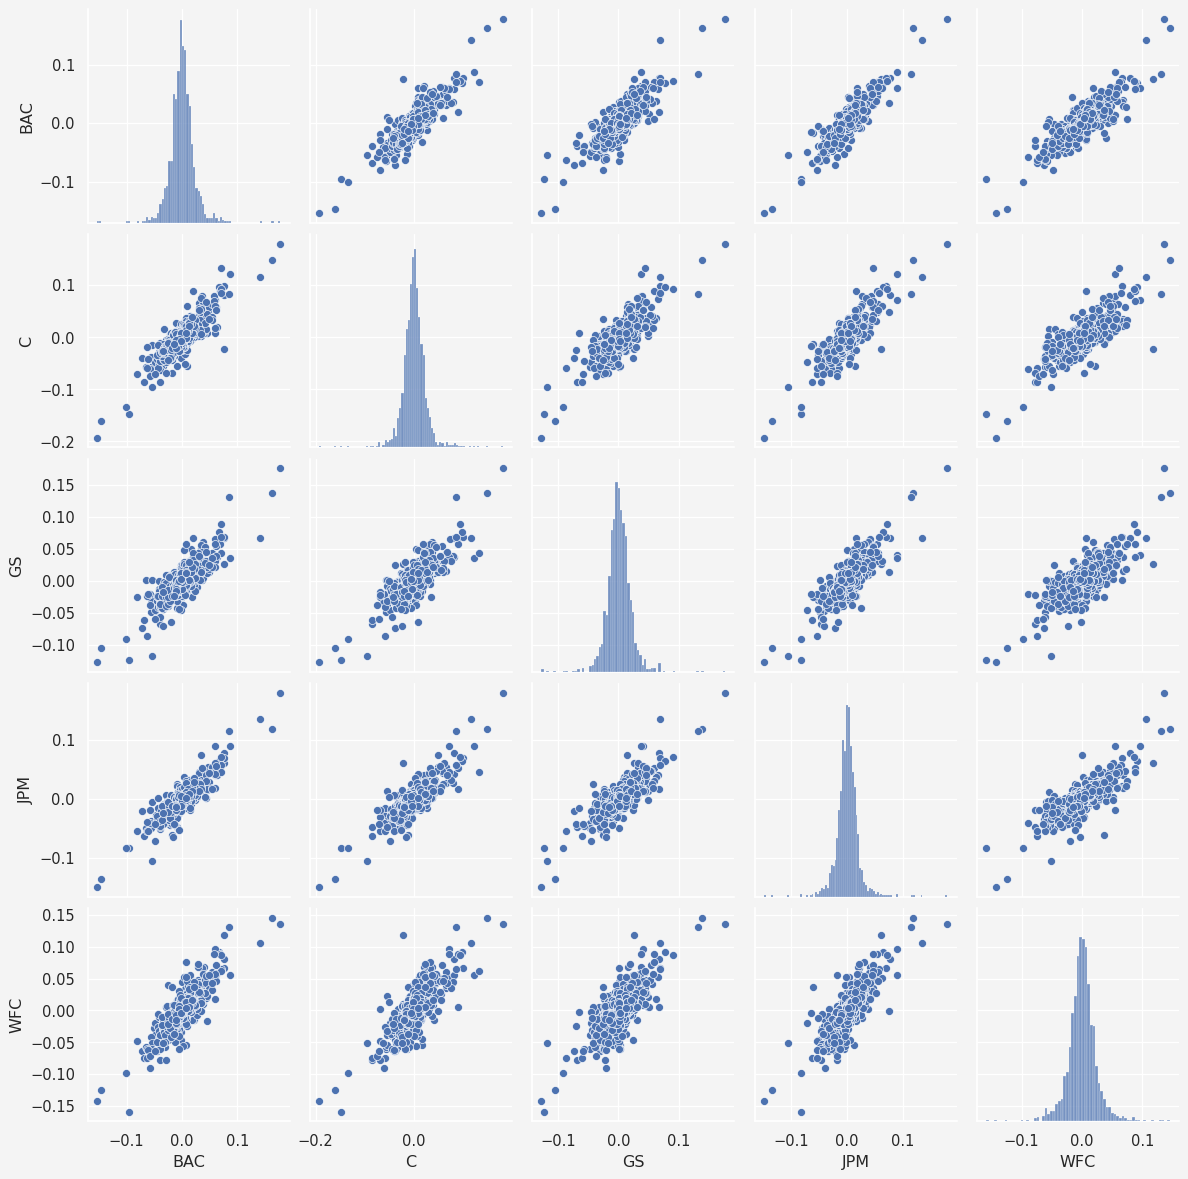

In [5]:
sns.pairplot(returns[1:])

Now to check the maximum and minimum return and on what dates that
happened

In [6]:
print('Minimum Return')
print(' ')
print(returns.idxmin())
print(' ')
print('Maximum Return')
print(' ')
print(returns.idxmax())

Minimum Return
 
Ticker
BAC   2020-03-16
C     2020-03-16
GS    2020-03-16
JPM   2020-03-16
WFC   2020-03-12
dtype: datetime64[ns]
 
Maximum Return
 
Ticker
BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
WFC   2020-03-24
dtype: datetime64[ns]

To find which bank is more risky we can simply check the standard
deviations of the returns of each bank

In [7]:
returns.std()

Ticker
BAC    0.022777
C      0.025008
GS     0.021063
JPM    0.020736
WFC    0.024904
dtype: float64

It seems like CITI na groop has the maximum value in the standared
deviations.

Now let’s check the distribution of Wells Fargo’s return in 2023

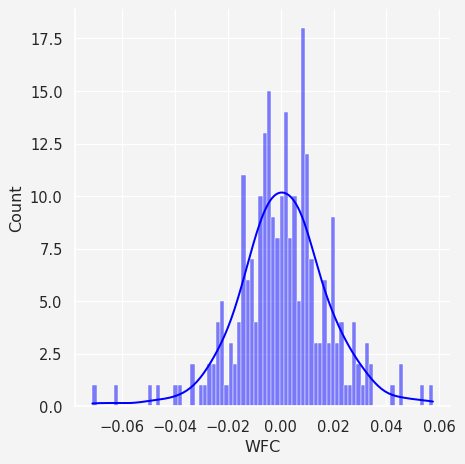

In [8]:
return_2023_wf = returns.loc['2023-01-01':'2023-12-31','WFC']
sns.displot(return_2023_wf, color='blue', bins=80, kde=True)

Next, we create the timeseries plot of the closing prices

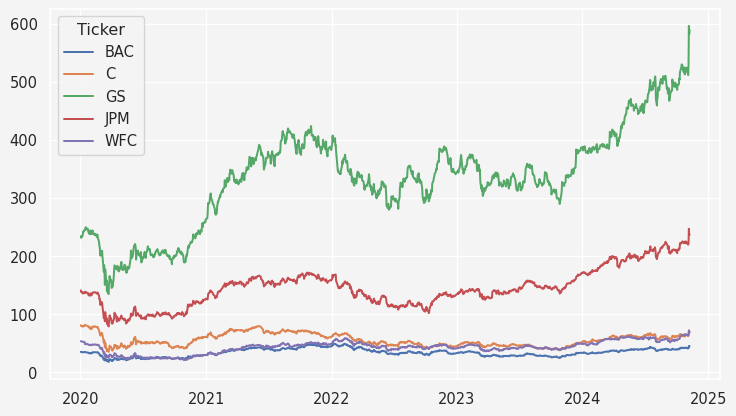

In [9]:
df.xs(key='Close', axis=1, level='Price').plot(figsize=(9,5))

In [10]:
import plotly
import cufflinks as cf
cf.go_offline()
df.xs(key='Close', axis=1, level='Price').iplot()

### Trend

Next we plot moving average for Wells Fargo

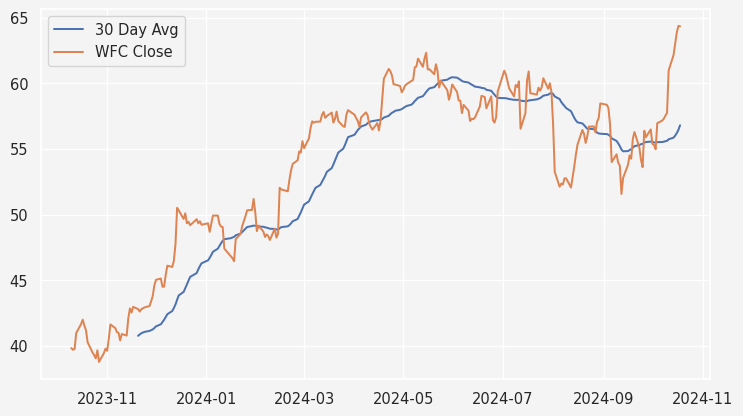

In [11]:
wfc = df['Close']['WFC']
start_date = pd.to_datetime('2023-10-10').date()
end_date = pd.to_datetime('2024-10-20').date()
wfc.loc[start_date:end_date].rolling(window=30).mean().plot(
    figsize=(9,5),label='30 Day Avg'
    )
wfc.loc[start_date:end_date].plot(
    label='WFC Close',figsize=(9,5)
    )
plt.legend()

### Price Movement Correlation

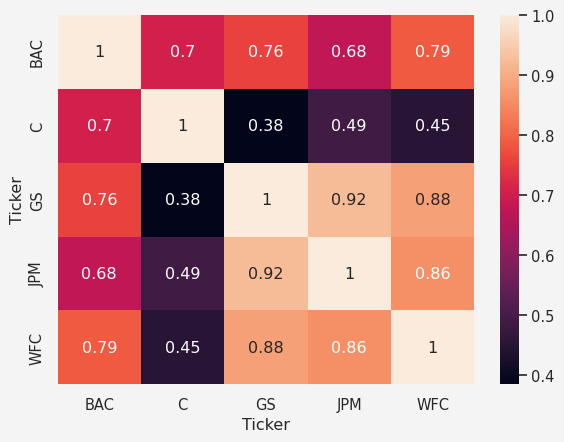

In [12]:
sns.heatmap(df.xs(key='Close', axis=1, level='Price').corr(), annot=True)

### Techniqal Analysis Plots

**Candle PLot**

In [13]:
wfc = df[['Open', 'High', 'Low', 'Close']].xs('WFC', level=1, axis=1)

# Define start and end dates
start_date = pd.to_datetime('2023-10-10').date()
end_date = pd.to_datetime('2024-10-20').date()

wfc_filtered = wfc.loc[start_date:end_date]
wfc_filtered.iplot(kind='candle')

**Bollinger Plot**

In [14]:
wfc_filtered['Close'].ta_plot(study='boll')

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/dataviz/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/dataviz/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/dataviz/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>